In [1]:
library(tidyverse)
library(repr)
library(readxl) 
library(lubridate) 
library(ggplot2) 
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz" 
players_data <- read_csv(url) 
players_data 

url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB" 
sessions_data <- read_csv(url) 
sessions_data

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [3]:
#convert experience collum so it's a factor type
players_data <- players_data |> 
mutate(experience = as_factor(experience))  

#getting rid of these columms because it just contains NA values 
players_data <- players_data |> 
select(-individualId, -organizationName) |> 
distinct()

#combining both data sets together
joined_data <- merge(sessions_data, players_data, by = "hashedEmail") 

#getting rid of these collums because I will be using start_time and end_time as those were the same but in a UNIX format
joined_data <- joined_data |> 
select(-original_start_time, -original_end_time	) 

#modifying start_time and end_time collums to be usuable
joined_data <- joined_data |>
mutate(start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |> 
  mutate(end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")) 

#calculating difference between start_time and end_time in minutes
thejoined_data <- joined_data |>
mutate(session_duration = as.numeric(difftime(end_time, start_time, units = "mins"))) |>
distinct()
thejoined_data 

#Grouping together the total amount of sessions each person has done
session_summary <- thejoined_data |>
  group_by(hashedEmail) |> 
  summarize(total_session_time = sum(session_duration, na.rm = TRUE), age = first(age), 
            experience = first(experience)) 
      session_summary



hashedEmail,start_time,end_time,experience,subscribe,played_hours,name,gender,age,session_duration
<chr>,<dttm>,<dttm>,<fct>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2024-05-23 00:22:00,2024-05-23 01:07:00,Regular,TRUE,1.5,Isaac,Male,20,45
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2024-05-22 23:12:00,2024-05-23 00:13:00,Regular,TRUE,1.5,Isaac,Male,20,61
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,2024-06-28 04:28:00,2024-06-28 04:58:00,Pro,FALSE,0.4,Lyra,Male,21,30
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-06-18 00:10:00,2024-06-18 00:42:00,Amateur,TRUE,56.1,Dana,Male,23,32
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,2024-09-14 15:33:00,2024-09-14 15:42:00,Amateur,TRUE,0.1,Fatima,Male,17,9
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,2024-04-26 09:11:00,2024-04-26 10:23:00,Beginner,TRUE,1.1,Caden,Male,20,72


hashedEmail,total_session_time,age,experience
<chr>,<dbl>,<dbl>,<fct>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,106,20,Regular
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30,21,Pro
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11,17,Beginner
⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,4795,23,Amateur
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,9,17,Amateur
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,72,20,Beginner


We are splitting the `session_summary` dataset into two parts, a training set and a testing set.
- Training set: This is the data we use to train our model.
- Testing set: This is the data we use to evaluate the model's performance on unseen data.

We use the `initial_split()` function to create this split. The `prop = 0.75` argument means that 75% of the data will be used for training, and the remaining 25% will be used for testing.

We also use the `strata = total_session_time` argument to ensure that the distribution of
`total_session_time` is similar in both the training and testing sets.

In [4]:
session_split <- initial_split( session_summary, prop = 0.75, strata = total_session_time)
session_training <- training(session_split)
session_testing <- testing(session_split)

We are specifying a K-Nearest Neighbors (KNN) regression model using the `nearest_neighbor()` function.
 `weight_func = "rectangular"`: This specifies how the algorithm weights the neighbors. A rectangular weighting means all neighbors within a given number (k) are treated equally.

`neighbors = tune()`: The number of neighbors (k) is left as a hyperparameter that we will tune later. 
This allows us to test different values of k and find the best one for our model.
`set_engine("kknn")`: This specifies the computational engine (kknn) used for KNN modeling.
`set_mode("regression")`: This tells the model we are performing regression (predicting continuous values like `total_session_time`).

In [5]:
session_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
       set_engine("kknn") |>
       set_mode("regression")


session_recipe <- recipe(total_session_time ~ age, data = session_training) |>
       step_scale(all_predictors()) |>
       step_center(all_predictors()) 
session_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [6]:
session_vfold <- vfold_cv(session_training, v = 5, strata = total_session_time) 

session_workflow <- workflow() |> 
add_recipe(session_recipe) |>
  add_model(session_spec) 
session_workflow


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [8]:
gridvals <- tibble(neighbors = seq(from = 1, to = 73, by = 10)) 

session_results <- session_workflow |> 
tune_grid(resamples = session_vfold, grid = gridvals) |>
  collect_metrics() 

→ A | warning: 71 samples were requested but there were 73 rows in the data. 68 will be used.

There were issues with some computations   A: x1

There were issues with some computations   A: x3





In [9]:
session_min <- session_results |>
    filter(.metric == "rmse") |>
    slice_min(order_by = mean) 
session_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,rmse,standard,1860.777,5,477.2312,Preprocessor1_Model2


In [10]:
k_min <- session_min |>
          pull(neighbors)

session_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
          set_mode("regression")

session_best_fit <- workflow() |>
          add_recipe(session_recipe) |>
          add_model(session_best_spec) |>
          fit(data = session_training)

session_summary <- session_best_fit |>
           predict(session_testing) |>
           bind_cols(session_testing) |>
           metrics(truth = total_session_time, estimate = .pred) 
session_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.910985e+03
rsq,standard,1.618961e-02
mae,standard,1.074355e+03


Warning message:
“Removed 54 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 55 rows containing missing values or values outside the scale range
(`geom_line()`).”


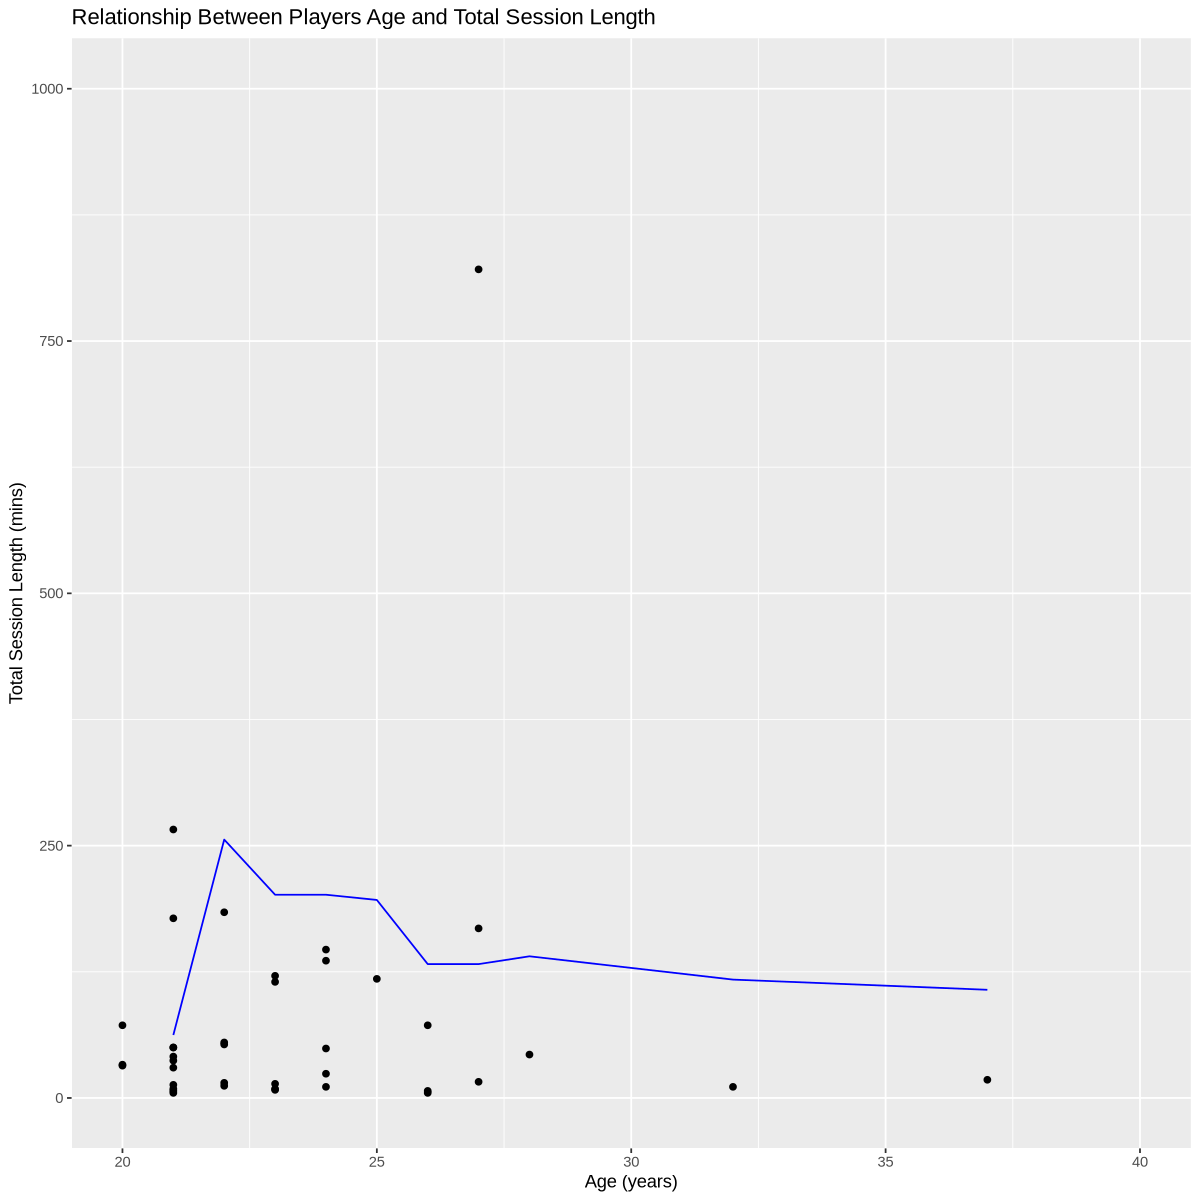

In [16]:
options(repr.plot.width = 10, repr.plot.height = 10)

session_preds <- session_best_fit |> 
predict(session_training) |>
    bind_cols(session_training) 

session_plot <- session_preds |> 
ggplot(aes(x = age, y = total_session_time)) + 
geom_point() +  
    geom_line(aes(y = .pred), color = "blue") + 
    labs(title = "Relationship Between Players Age and Total Session Length",
         x = "Age (years)",
         y = "Total Session Length (mins)") + 
xlim(20, 40) + 
ylim(0, 1000)
session_plot